**ETAPA 1. Descripción del Proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
       - identificar a los grupos objetivo;
       - sugerir medidas para reducir la rotación;
       - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

**Para iniciar se deben cargar todas las librerías que se van a usar durante el proyecto.**

In [26]:
# Cargar todas las librerías
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
import seaborn as sns
import pandas as pd

**En este sección reuní el dataframe, la función .read_csv permite leer el archivo cargado.**

In [27]:
# leer el conjunto de datos en el DataFrame
df_gym_churn = pd.read_csv('./datasets/gym_churn_us.csv')

**Uso las funciones info() y head() para explorar visualmente el dataframe en cuestión con el fin de analizar que campos tiene, sus características, y los detalles que no sean funcionales corregir, para hacer un análisis acorde e ideal a lo solicitado.**

In [28]:
# Imprime la información general/resumida sobre el DataFrame experimento de registros
df_gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [29]:
# Imprimir una muestra de los datos para el experimento de registros
df_gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**ETAPA 2. Preprocesamiento de los datos**

**El objetivo aquí es preparar los datos para que sean analizados. Para ello hay que resolver cualquier problema que haya con los encabezados con el fin preservar las reglas del buen estilo, luego identificar los valores ausentes y en su caso completar dichos valores, y finalmente identificar y si fuera necesario eliminar los valores duplicados.**

**Gym Churn 'Abandono del Gimnasio'**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS**

a. Cambiar todas las columnas a minúsculas con el fin de preservar las reglas del buen estilo.

b. Calcular el número de valores ausentes.

c. Revisar y eliminar duplicados.

**Tratamiento de las columnas**

In [30]:
# Mostrar los nombres de las columnas
df_gym_churn.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [31]:
# Generar una función con el fin de reemplazar los nombres de las columnas para ponerlos en minúsculase 
def clear_columns(data):
    new_columns = []
    
    for column in data.columns:
        clean_column = column.lower()
        new_columns.append(clean_column)
        
    data.columns = new_columns
    
    return data

In [32]:
# Aplicar la función al dataframe visitas
df_gym_churn = clear_columns(df_gym_churn)

In [33]:
# Comprobar el resultado: la lista de encabezados
df_gym_churn.head(0)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


**Tratamiento de los valores ausentes**

Para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe ABANDONO DEL GIMNASIO no cuenta con información de este tipo en ninguna de sus columnas.

In [34]:
# Calcular el número de valores ausentes
df_gym_churn.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

**Revisar y eliminar duplicados**

In [35]:
# Revisar si hay valores duplicados
df_gym_churn.duplicated().sum()

0

**ETAPA 3. Análisis exploratorio de datos**

# Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [36]:
# Utilizar el método describe
df_gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Conclusión**

Respecto a el análisis de los valores promedio y desviación estándar del dataset utilizando el **método describe** se puede visualizar lo siguiente respecto a cada una de las características **GÉNERO** indica que la distribución está cerca de la mitad, lo que sugiere que hay una distribución equilibrada de género en los datos, **UBICACIÓN CERCANA** la mayoría de los usuarios parecen tener el gimnasio cerca, ya que el valor promedio es alto, **COMPAÑÍA ASOCIADA** esto indica que aproximadamente la mitad de los usuarios tiene un compañero de gimnasio, **PROMO AMIGOS** un bajo porcentaje de usuarios recibió promociones de amigos, dado que el promedio está más cerca de 0, **TELÉFONO** la mayoría de los usuarios han proporcionado un número de teléfono, **PERÍODO DE CONTRATO** el período promedio de contrato es relativamente corto, pero la desviación estándar sugiere que hay una amplia variabilidad en la duración de los contratos, **VISITAS GRUPALES** un porcetaje moderado de usuarios tiene visitas grupales habilitadas, **EDAD** la edad promedio de los usuarios es de 29 años, con una desviación estándar que indica una variabilidad moderada en las edades, **CARGOS ADICIONALES PROMEDIO** hay una gran variabilidad, lo que sugiere que algunos usuarios tienen cargos mucho más altos que otros, **MES PARA FINALIZAR EL CONTRATO**, la mayoría de los usuarios tienen entre 4 y 5 meses restantes en su contrato, con una alta variabilidad, **TIEMPO DE VIDA** la duración promedio del tiempo de vida en meses de los usuarios con el gimnasio es baja, con una gran variabilidad, **FRECUENCIA PROMEDIO DE CLASES** los usuarios tienen una frecuencia moderada de clases, con variabilidad, ya que algunos asisten más que otros, **FRECUENCIA PROMEDIO DE CLASES DEL MES ACTUAL** es muy similar a la frecuencia promedio de clases total, pero para el mes actual, con una leve diferencia en la media, y **TASA DE CANCELACIÓN** un 27% de los usuarios han abandonado el gimnasio, con una desviación estándar significativa. Finalmente el análisis proporciona una visión general del comportamiento de los usuarios en cuanto a su interacción con el gimnasio y las características demográficas. 

# Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [37]:
# Agrupar el DataFrame GYM CHURN por la columna 'Churn'
grouped_df = df_gym_churn.groupby('churn').mean()
grouped_df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


# Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

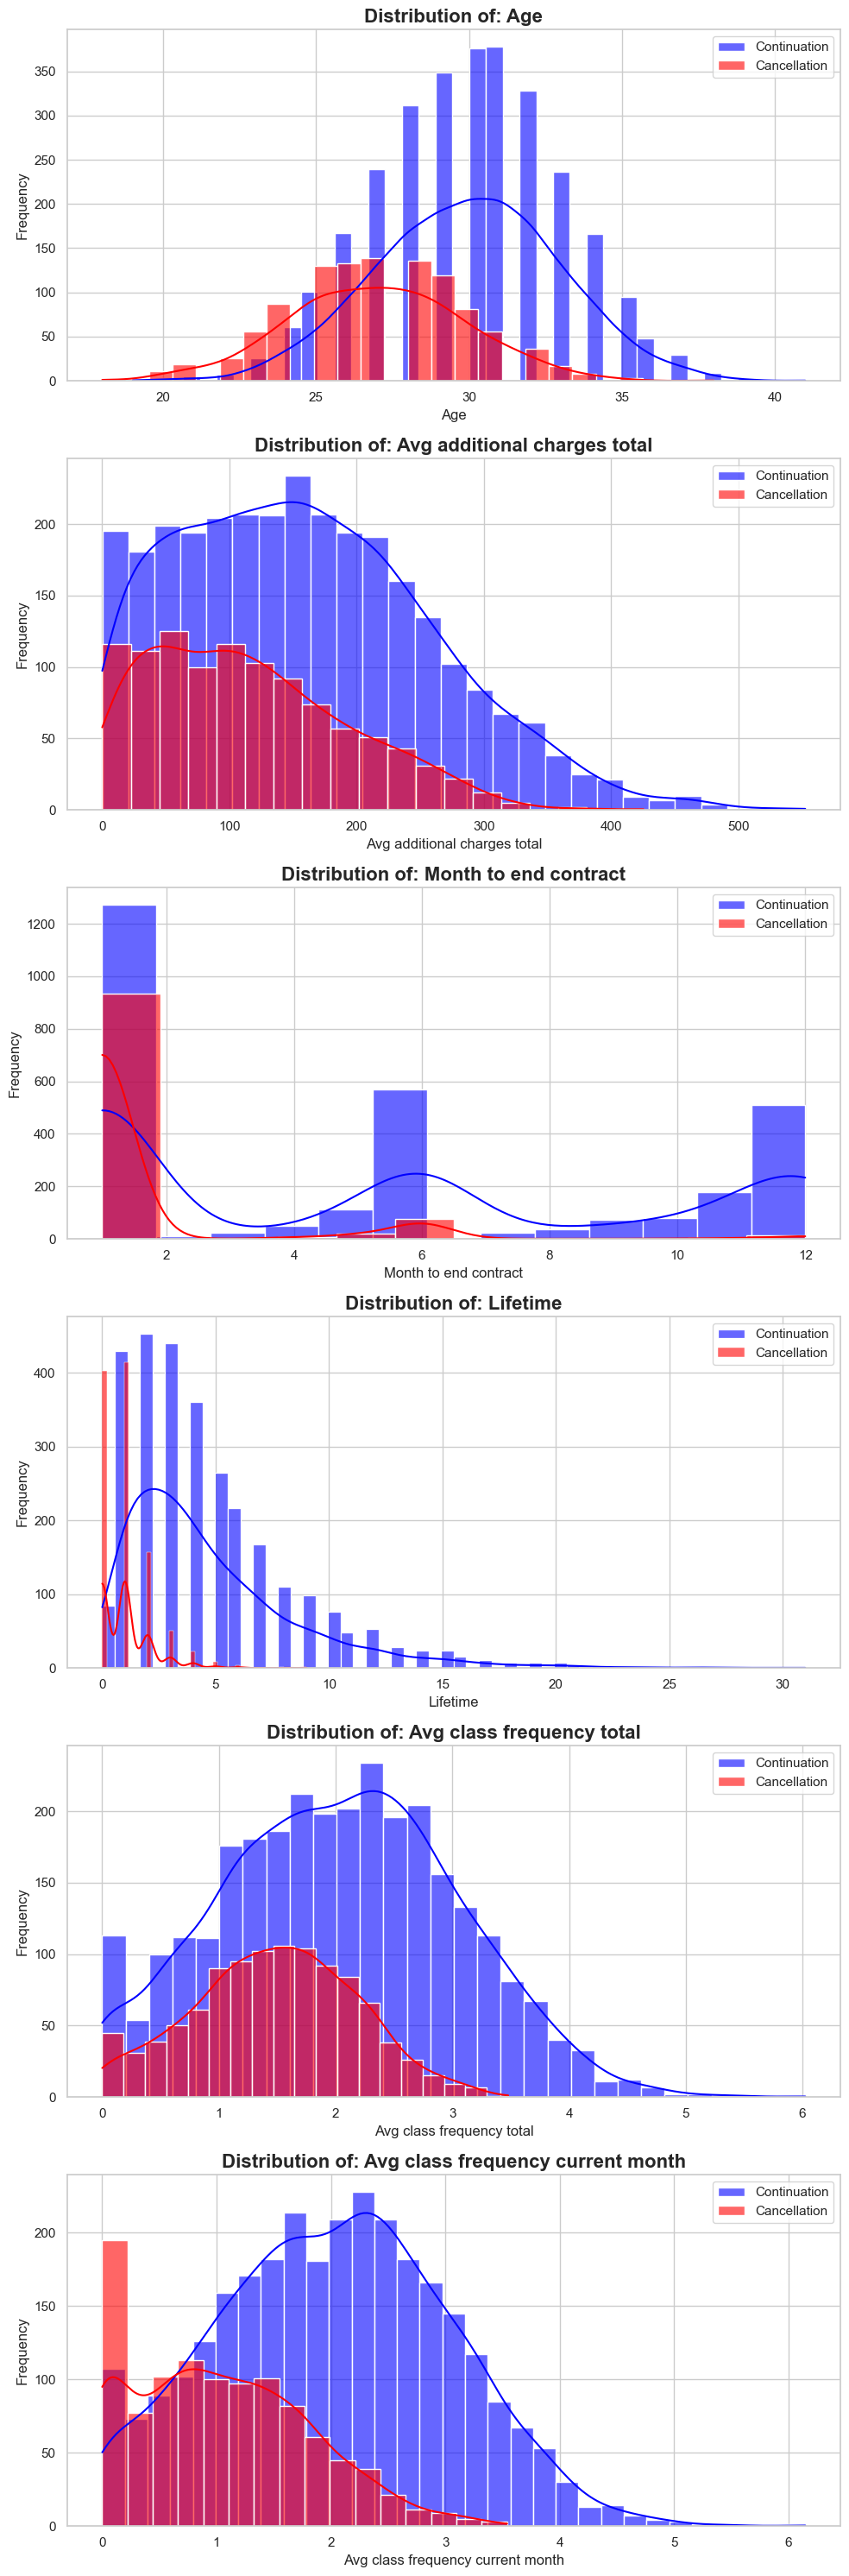

In [38]:
# Listar las características a visualizar
features = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
            'avg_class_frequency_current_month']

# Aplicar el estilo de los gráficos
sns.set(style="whitegrid", palette="muted")

# Generar las etiquetas personalizadas para el eje x
axis_labels = {
    'age': 'Age',
    'avg_additional_charges_total': 'Avg additional charges total',
    'month_to_end_contract': 'Month to end contract',
    'lifetime': 'Lifetime',
    'avg_class_frequency_total': 'Avg class frequency total',
    'avg_class_frequency_current_month': 'Avg class frequency current month',
}

# Crear subplots
fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)))

# Iterar sobre las características y trazar los histogramas y distribuciones
for i, feature in enumerate(features):
    # Generar el histograma para ambas distribuciones en una sola gráfica
    sns.histplot(df_gym_churn[df_gym_churn['churn'] == 0][feature], kde=True, ax=axes[i], 
                 color='blue', label='Continuation', alpha=0.6)
    sns.histplot(df_gym_churn[df_gym_churn['churn'] == 1][feature], kde=True, ax=axes[i], 
                 color='red', label='Cancellation', alpha=0.6)
    axes[i].set_title(f'Distribution of: {axis_labels[feature]}', fontsize=16, weight='bold')
    axes[i].set_xlabel(axis_labels[feature], fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)
    axes[i].legend()

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Guardar la figura
plt.savefig('combined_distribution_plots.png', dpi=300)

# Mostrar el gráfico
plt.show()

**Observaciones**

Antes de comenzar a realizar la interpretación de cada una de las gráficas cabe señalar que no consideré todas las características para realizar este proceso ya que los datos que contienen dichas características no representan información útil para el análisis y que por el contrario podrían sesgar el resultado final óptimo del proyecto. Por otro lado cabe mencionar que el color azul en las gráficas representa continuidad y el color rojo cancelación, es decir, churn==0 continuidad y churn==1 cancelación.

**a. Gráfica distribución de la edad** como se puede visualizar la mayoría de los miembros se encuentran entre los 20 y 35 años, ambas distribuciones tienen un pico alrededor de los 30 años, y no hay diferencias significativas entre los que continúan y los que cancelan en términos de edad. 


**b. Gráfica de distribución de los cargos adicionales promedio** como se puede ver los miembros que continúan tienden a tener cargos adicionales más altos, con un pico alrededor de 100, los miembros que cancelan tienen un pico alrededor de 50 en cargos adicionales. Esto sugiere que los miembros dispuestos a gastar más en servicios adicionales tienden a ser más leales.


**c. Gráfica de distribución de los meses para finalizar el contrato** como se puede observar la mayoría de las cancelaciones ocurren dentro de los primedos dos meses, las continuaciones están más distribuidas uniformemente  a lo largo del período del contrato. Indica que los miembros que cancelan tienden a hacerlo rápidamente, mientras que los que permanecen tienden a seguir durante más tiempo.


**d. Gráfica de distribución de la vida útil** como se puede visualizar los miembros que cancelan tienden a tener una vida útil mas corta, con un pico alrededor de 1, los miembros que continúan tienen una distribución más dispersa con un pico alrededor de 5. Los usuarios con una vida útil más larga son menos propensos a cancelar. 


**e. Gráfica de distribución de la frecuencia promedio de clases:** como se puede ver los miembros que continúan tienden a tener frecuencias de clases más altas, con un pico alrededor de 2, los miembros que cancelan tienen un pico alrededor de 1 en frecuencia de clases. La mayor participación en clases parece estar asociada con una mayor retención.


**f. Gráfica de distribución de la frecuencia promedio de clases en el mes actual:** como se puede observar los miembros que continúan tienden a tener frecuencias de clases más altas en el mes actual, con un pico alrededor de 2, los miembros que cancelan tienen un pico alrededor de 0 en frecuencias de clases. La participación reciente en clases está asociada con la retención, sugiriendo que mantener a los usuarios activos en clases podría reducir las cancelaciones.

# Crea una matriz de correlación y muéstrala.

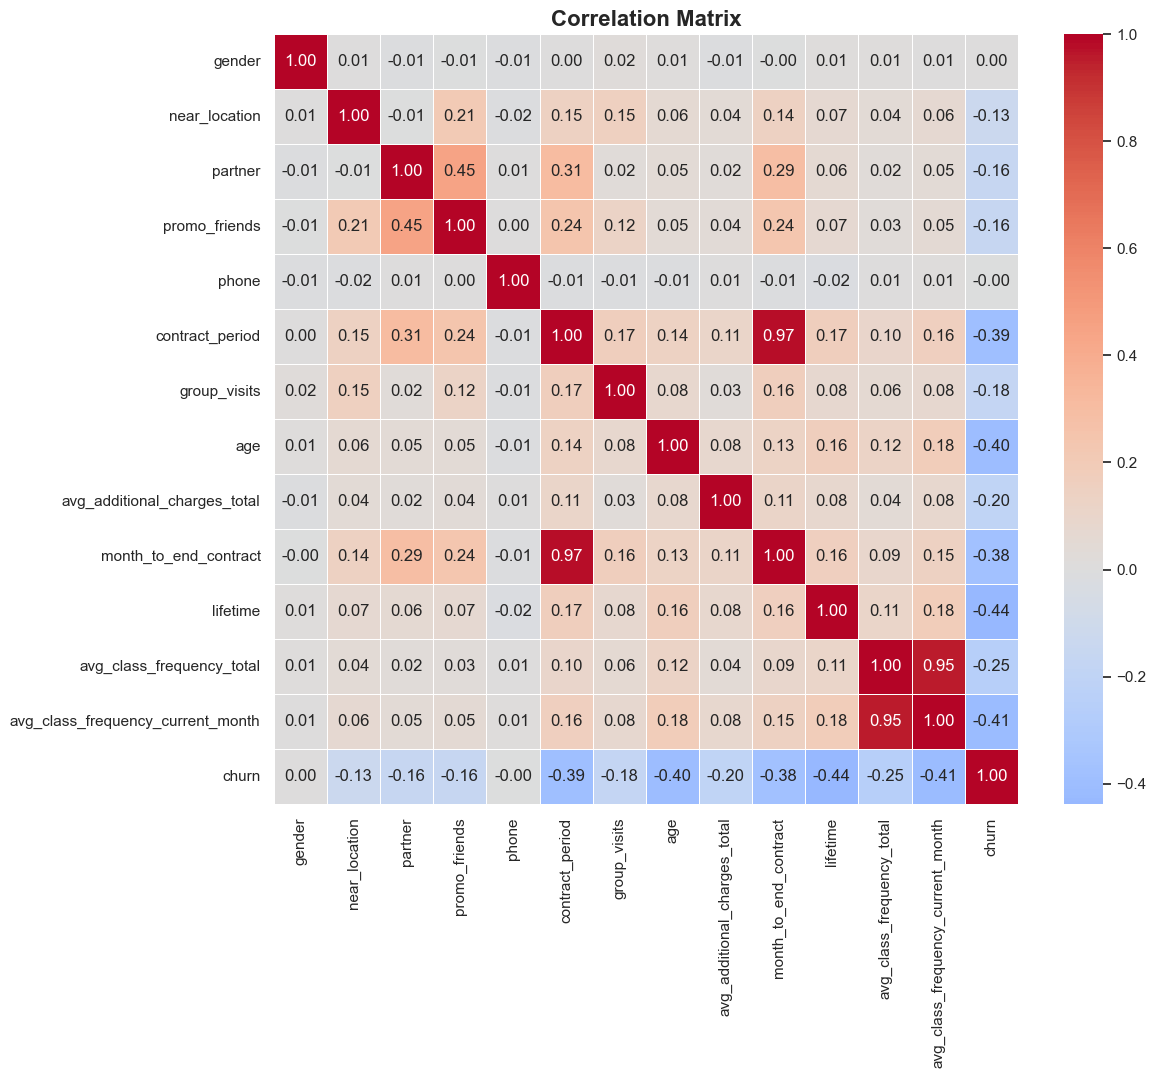

In [39]:
# Crear la matriz de correlación
corr_gym_churn = df_gym_churn.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear un mapa de calor (heatmap) para la matriz de correlación
sns.heatmap(corr_gym_churn, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')

# Generar el título del gráfico
plt.title('Correlation Matrix', fontsize=16, weight='bold')

# Mostrar el gráfico
plt.show()

**Observaciones**

- **Período de contrato y meses para finalizar el contrato:** tienen una correlacción positiva fuerte, estás dos variables están fuertemente relacionadas, lo cual es cierto ya que la duración del contrato afecta directamente el tiempo restante en el contrato.


- **Frecuencia promedio de clases y frecuencia promedio de clases del mes actual:** tiene una correlación positiva fuerte, los usuarios que asisten frecuentemente a clases en general también tienden a hacerlo en el mes actual.


- **Tiempo de vida y cancelación:** tiene una correlacción negativa moderada, los usuarios con una mayor duración de membresía tienden a tener una menor tasa de cancelación. Esto sugiere que cuanto más tiempo han sido miembros, menos probable es que cancelen. 


- **Período de contrato y cancelación:** tiene una correlación negativa moderada, los usuarios con períodos de contrato más largo tienden a tener una menor tasa de cancelación. Esto podría indicar que los contratos más largos fomentan la lealtad. 


- **Meses para finalizar el contrato y cancelación:** tiene una correlacción negativa moderada, similar a la observación anterior, los usuarios con más tiempo restante en sus contratos tienden a cancelar menos.

**ETAPA 4. Construir un modelo para predecir la cancelación de usuarios**

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

# Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [40]:
# Separar características y objetivo
X = df_gym_churn.drop(columns=['churn'])
y = df_gym_churn['churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto StandardScaler y aplícalo al conjunto de entrenamiento
scaler = StandardScaler()

# Entrenar el modelo y transformar la matriz para el conjunto de entrenamiento
X_train_st = scaler.fit_transform(X_train)

# Aplicar la estandarización a la matriz de característica para el test de prueba
X_val_st = scaler.transform(X_val)

# Entrena el modelo en el set de entrenamiento con dos métodos: 

- Regresión logística;
- Bosque aleatorio.


In [41]:
# REGRESIÓN LOGÍSTICA

# Crear el modelo 
log_reg_model = LogisticRegression(random_state=42)

# Entrenar el modelo logistic regression
log_reg_model.fit(X_train_st, y_train)

# Hacer predicciones sobre el conjunto de prueba
log_reg_predictions = log_reg_model.predict(X_val_st)

# Generar las probabilidades para la clase positiva (churn = 1)
log_reg_probabilities = log_reg_model.predict_proba(X_val_st)[:, 1]

# Mostrar todas las métricas
def print_all_metrics(y_true, predictions, probabilities):
    print(f'Precisión del modelo de bosque aleatorio: {accuracy_score(y_true, predictions)}')
    print(f'\n')
    print(f'Reporte de clasificación para bosque aleatorio:\n{classification_report(y_true, predictions)}')

print_all_metrics(y_val, log_reg_predictions, log_reg_probabilities)

Precisión del modelo de bosque aleatorio: 0.91625


Reporte de clasificación para bosque aleatorio:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800



In [42]:
# BOSQUE ALEATORIO

# Crear el modelo 
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Entrenar el modelo random forest
rf_model.fit(X_train_st, y_train)

# Utilizar el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_val_st)

# Generar las probabilidades para la clase positiva (churn = 1)
rf_probabilities = rf_model.predict_proba(X_val_st)[:,1]

# Mostrar todas las métricas
def print_all_metrics(y_true, predictions, probabilities):
    print(f'Precisión del modelo de bosque aleatorio: {accuracy_score(y_true, predictions)}')
    print(f'\n')
    print(f'Reporte de clasificación para bosque aleatorio:\n{classification_report(y_true, predictions)}')

print_all_metrics(y_val, rf_predictions, rf_probabilities)

Precisión del modelo de bosque aleatorio: 0.91


Reporte de clasificación para bosque aleatorio:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



# Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [43]:
# Evaluar el modelo de REGRESIÓN LOGÍSTICA
log_reg_accuracy = accuracy_score(y_val, log_reg_predictions)
log_reg_precision = precision_score(y_val, log_reg_predictions)
log_reg_recall = recall_score(y_val, log_reg_predictions)

print(f'Exactitud del modelo de Regresión Logística: {log_reg_accuracy}')
print(f'Precisión del modelo de Regresión Logística: {log_reg_precision}')
print(f'Recall del modelo de Regresión Logística: {log_reg_recall}')

Exactitud del modelo de Regresión Logística: 0.91625
Precisión del modelo de Regresión Logística: 0.8729281767955801
Recall del modelo de Regresión Logística: 0.7821782178217822


In [44]:
# Evaluar el modelo de BOSQUE ALEATORIO 
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)

print(f'Exactitud del modelo de Bosque Aleatorio: {rf_accuracy}')
print(f'Precisión del modelo de Bosque Aleatorio: {rf_precision}')
print(f'Recall del modelo de Bosque Aleatorio: {rf_recall}')

Exactitud del modelo de Bosque Aleatorio: 0.91
Precisión del modelo de Bosque Aleatorio: 0.8494623655913979
Recall del modelo de Bosque Aleatorio: 0.7821782178217822


**Conclusión**

Dado que el modelo de REGRESIÓN LOGÍSTICA tiene una exactitud y presión ligeramente superior en comparación con el modelo de BOSQUE ALEATORIO, se puede **concluir** que el modelo de REGRESIÓN LOGÍSTICA dio mejores resultados. Si bien ambos modelos tienen un rendimiento similar en términos de exactitud y recall, la REGRESIÓN LOGÍSTICA tiene una ventaja en precisión.

**ETAPA 5. Crear clústeres de usuarios/as**

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as).

# Estandariza los datos.

In [45]:
# Separar las características sin la columna 'churn'
X_cluster = df_gym_churn.drop(columns=['churn'])

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos para estandarizarlos
X_cluster_st = scaler.fit_transform(X_cluster)

# Crear un nuevo DataFrame con los datos estandarizados
df_cluster_st = pd.DataFrame(X_cluster_st, columns=X_cluster.columns)

# Mostrar las primeras filas del DataFrame estandarizado
df_cluster_st.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542


# Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

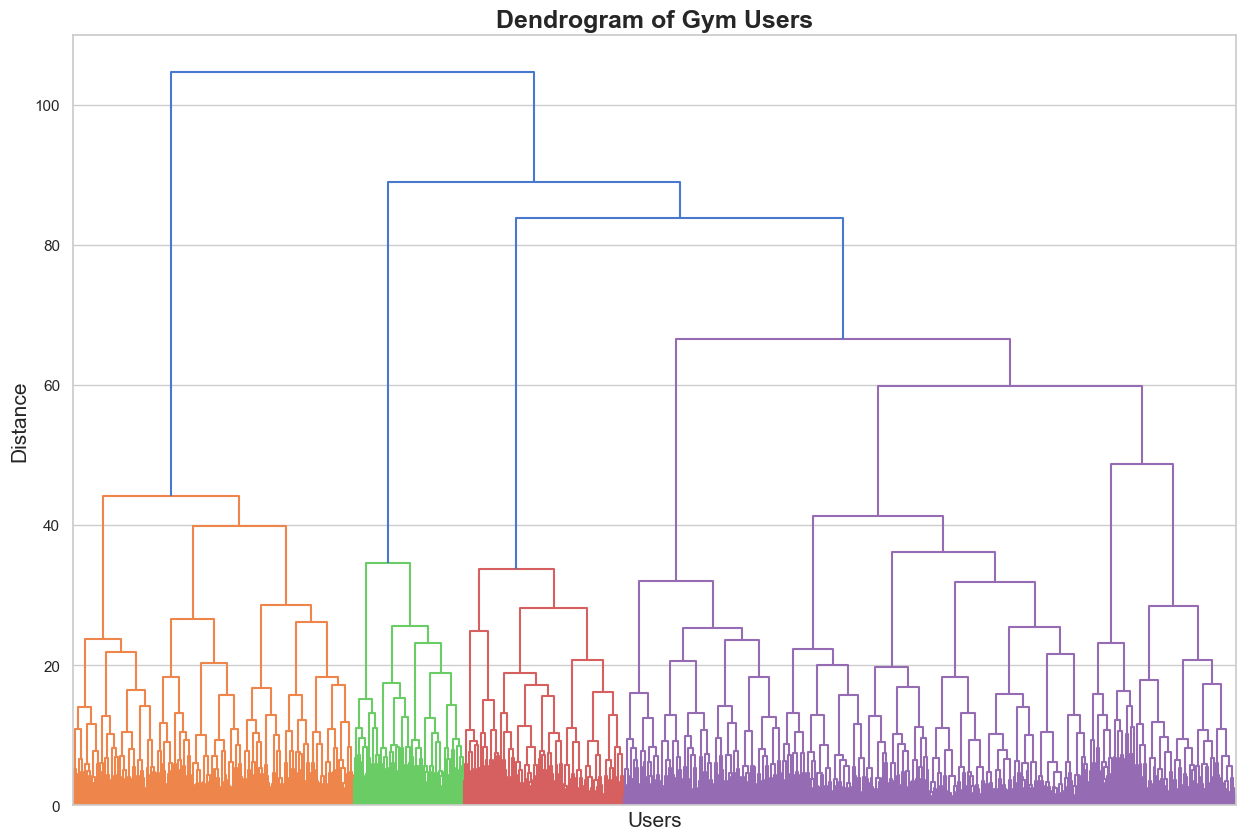

In [46]:
# Crear la matriz de distancias utilizando el método 'ward'
linked = linkage(X_cluster_st, method='ward')

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Trazar el dendrograma
dendrogram(linked, leaf_rotation=45, leaf_font_size=16)

# Generar el título del gráfico
plt.title('Dendrogram of Gym Users', fontsize=18, fontweight='bold')

# Generar las etiquetas de los ejes
plt.xlabel('Users', fontsize=15)
plt.ylabel('Distance', fontsize=15)

# Ocutar las etiquetas del eje x
plt.xticks([])

# Mostrar el gráfico
plt.show()

**Observaciones**


- Estructura Jerárquica: El dendrograma comienza con cada usuario como un clúster individual en la parte inferior. A medida que se asciende en el gráfico, los clústeres se combinan en grupos más grandes. Las líneas horizontales indican la distancia a la que se combinan los clústeres.


- Número de clústeres: Los colores diferentes indican los clústeres principales que se han identificado en el análisis. Aunque se están buscando cinco clústeres, parece que el dendrograma muestra solo cuatro colores. Esto podría deberse a que algunos clústeres son muy similares entre sí y se combinan en el análisis jerárquico.


- Distancia de combinación: La distancia en el eje vertical representa la similitud entre los clústeres. Cuanto más baja sea la línea horizontal de combinación, más similares son los clústeres. Las líneas más altas indican combinaciones de clústeres que son menos similares entre sí.


- Identificación de clústeres: Los colores y las líneas horizontales permiten identificar los clústeres principales.


En **conclusión**, la visualización de solo cuatro clústeres en el dendrograma, en lugar de cinco, se debe a la alta similitud entre ciertos clústeres. Esta similitud provoca que el algoritmo de agrupamiento jerárquico los combine en niveles inferiores del dendrograma, lo que se refleja en la representación con el mismo color. 

# Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [47]:
# Crear el modelo K-means con n=5 clústeres
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Entrenar el modelo y predecir los clústeres
clusters = kmeans_model.fit_predict(X_cluster_st)

# Añadir los clústeres al DataFrame original
df_gym_churn['cluster'] = clusters

# Mostrar el número de usuarios en cada clúster
df_gym_churn['cluster'].value_counts()

cluster
0    1283
4     894
2     646
1     633
3     544
Name: count, dtype: int64

# Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [48]:
# Calcular los valores medios de las características para cada clúster
cluster_means = df_gym_churn.groupby('cluster').mean()

# Mostrar los valores medios
cluster_means

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.484801,0.698363,0.301637,0.007015,0.899454,1.733437,0.255651,28.074825,127.131782,1.657833,2.089634,1.256531,0.991781,0.587685
1,0.494471,0.947867,0.791469,0.998420,0.906793,2.740916,0.431280,28.903633,139.456908,2.540284,3.529226,1.619489,1.488508,0.285940
2,0.464396,0.913313,0.766254,0.493808,0.925697,10.495356,0.506192,30.091331,164.190347,9.484520,4.693498,2.888801,2.886027,0.013932
3,0.547794,0.937500,0.742647,0.424632,0.863971,11.194853,0.575368,29.720588,167.670439,10.347426,4.818015,1.154578,1.139605,0.042279
4,0.568233,0.878076,0.178971,0.048098,0.914989,2.120805,0.456376,29.993289,155.602830,2.013423,4.844519,2.667290,2.650122,0.105145


**Conclusión**

Las diferencias en la tasa de cancelación, las promociones de amigos y el período de contrato destacan como factores importantes que diferencian a los clústeres. Estos hallazgos pueden proporcionar información valiosa para diseñar estrategias específicas de marketing y retención para cada grupo de usuarios.

# Traza distribuciones de características para los clústeres. ¿Notas algo?

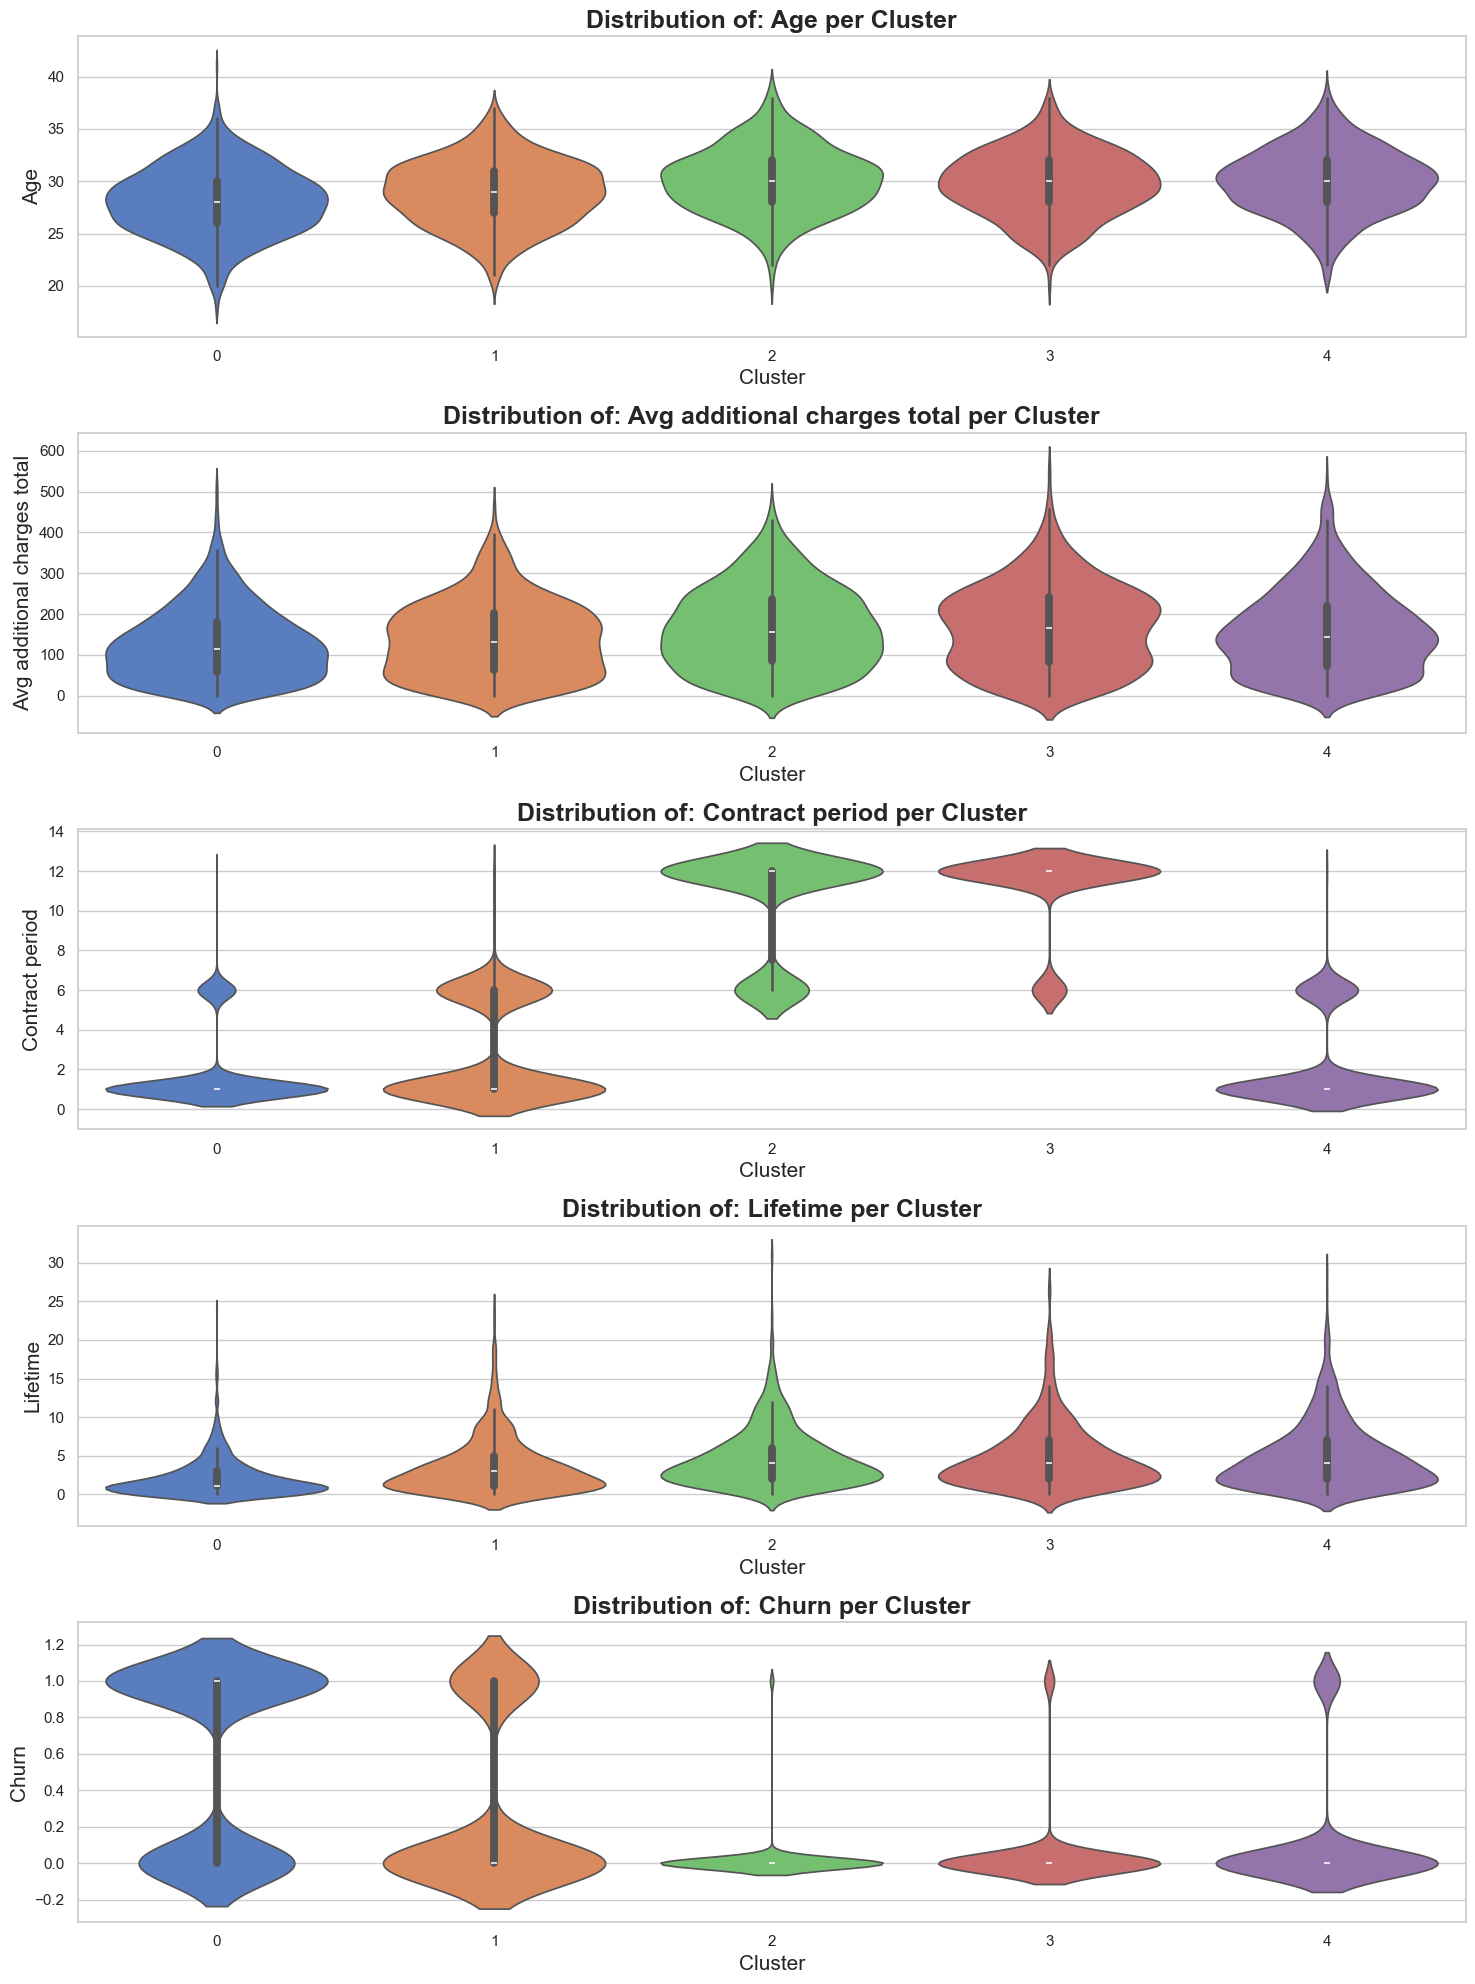

In [49]:
# Listar las características a trazar
features = ['age', 'avg_additional_charges_total', 'contract_period', 'lifetime', 'churn']

# Generar las etiquetas personalizadas para el eje y
y_labels = {
    'age': 'Age',
    'avg_additional_charges_total': 'Avg additional charges total',
    'contract_period': 'Contract period',
    'lifetime': 'Lifetime',
    'churn': 'Churn'
}

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 20))

# Crear gráficos de violín para cada característica con etiquetas personalizadas en el eje y
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.violinplot(x='cluster', y=feature, data=df_gym_churn, hue='cluster', palette='muted', legend=False)
    plt.title(f'Distribution of: {y_labels[feature]} per Cluster', fontsize=18, fontweight='bold')
    plt.xlabel('Cluster', fontsize=15)
    plt.ylabel(y_labels[feature], fontsize=15)

# Ajustar la disposición del gráfico
plt.tight_layout()
plt.show()

**¿Notas algo?**

- Gráfico 'Edad' en el clúster 0 y  1, se ve una distribución más uniforme en comparación con el resto de los clústeres, el clúster 3 tiene una mayor concentración de usuarios más jóvenes en comparación con los demás clústeres.


- Gráfica 'Cargos Adicionales Promedio' el clúster 1 y 2 muestran una mayor variabilidad en los cargos adicionales, el clústerr 3 tiene una concentración de usuarios con cargos adicionales más bajos.


- Gráfica 'Período de Contrato' el clúster 2 tiene usuarios con períodos de contrato mucho más largos en comparación con los otros clústeres, el clúster 3 tiene una distribución más concentrada en períodos de contratación cortos.


- Gráfica 'Vida Útil' en el clúster 2, se observa una distribución de usuarios con una vida útil más larga, el clúster 3 muestra usuarios con una vida útil más corta.


- Gráfica 'Cancelación' el clúster 3 tiene una concentración notable de usuarios con una alta tasa de cancelación, el clúster 2 muestra una baja tasa de cancelación.

# Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [50]:
# Calcular la tasa de cancelación para cada clúster
cancelation_rate = df_gym_churn.groupby('cluster')['churn'].mean()

# Convertir la serie en un DataFrame
cancelation_rate = cancelation_rate.reset_index()

# Cambiar el nombre de las columnas
cancelation_rate.columns = ['cluster', 'cancelation_rate']

# Mostrar la tasa de cancelación por clúster
cancelation_rate

,cluster,cancelation_rate
0,0,0.587685
1,1,0.285940
2,2,0.013932
3,3,0.042279
4,4,0.105145


**¿Difieren en términos de tasa de cancelación?**
Sí, los clústeres difieren significativamente en términos de tasa de cancenlación.

- Clúster 0 y 4 tienen una tasa de cancelación moderada, estos podrían beneficiarse de un enfoque equilibrado entre estrategias de retención y adquisión de nuevos clientes.


- Clúster 1 tiene una tasa de cancelación relativamente baja, este también tiene una buena retención de usuarios. Estrategias adicionales para fortalecer la lealtad, como recompensas por la duración de la membresía, podrían ser beneficiosas.


- Clúster 2 tiene una tasa de cancelación más baja, los usuarios en este clúster tienen una alta retención y parecen estar comprometidos a largo plazo. Estrategias de fidelización y programas de beneficios exclusivos podrían ser útiles para mantener este alto nivel de retención.


- Clúster 3 tiene una tasa de cancelación más alta, los usuarios en este clúster son los más propensos a cancelar su membresía. Este grupo podría beneficiarse de estrategias específicas de retención, como mejorar la experiencia del cliente.

**¿Qué grupos son propensos a irse y cuáles son leales?**

- Grupos propensos a irse con una alta tasa de cancelación
1. Clúster 3 los usuarios en este clúster son los más propensos a irse.
Tienen: Usuarios más jóvenes, contratos cortos, menor gasto en cargos adicionales, alta concentración de usuarios con baja frecuencia de visitas grupales.


- Grupos leales baja tasa de cancenlación
1. Clúster 2 este grupo tiene la tasa de cancelación más baja, indicando una alta lealtad y retención de usuarios.
Tienen: Usuarios con contratos largos, mayor vida útil, dispuestos a gastar más en cargos adicionales, menor tasa de cancelación.


2. Clúster 1 este grupo también muestra una buena retención de usuarios, aunque no tan alta como el clúster 2.
Tienen: una distribución relativamente uniforme de usuarios, buena retención, potencial para fortalecer la lealtad con estrategias adicionales.



- Grupos con tasa de cancelación moderada
1. Clúster 0 este grupo tiene una tasa de cancelación moderada, lo que sugiere que algunos usuarios pueden estar propensos a irse, pero no es tan crítico como en el clúster 3.
Tienen: una distribución una distribución más uniforme en varias características, buena retención, equilibrio entre estrategias de retención y adquisión.



2. Clúster 4 similar al clúster 0, este grupo tiene una tasa de cancelación moderada.
Tienen: menor vida útil, contratos moderados, distribución uniforme de usuarios.


Identificar estos patrones puede ayudar a diseñar intervenciones específicas para mejorar la retención de usuarios y aumentar la satisfacción del cliente.

**Etapa 6: Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes**

# Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

**Conclusiones**

- Segmentación de clientes:

a. He identificado cinco clústeres de usuarios con características y comportamientos distintos.


b. Los clústeres varían significativamente en términos de edad, frecuencia de visitas, duración de la membresía, gastos adicionales y tasas de cancelación. 


- Tasa de cancelación:

a. El clúster 3 tiene la tasa de cancelación más alta, lo que indica que los usuarios en este clúster son los más propensos a cancelar su membresía.


b. El clúster 2 tiene la tasa de cancelación más baja, lo que sugiere una alta lealtad y compromiso a largo plazo de los usuarios en este grupo.


- Comportamiento de uso

a. El clúster 4 tiene usuarios más jóvenes con una alta frecuencia de visitas y menor duración de membresía.


b. El clúster 3 tiene usuarios con contratos más cortos, menor frecuencia de visitas y una alta tasa de cancelación.


- Gastos adicionales

a. El clúster 2 muestra la mayor disposición a gastar en cargos adicionales, mientras que el clúster 3 tiene los gastos adicionales promedio más bajos.

**Recomendaciones para la estrategia de interacción y retención de clientes**

1. Clúster 3 alta tasa de cancelación


a. Estrategias de retención: Implementar programas de mejora de la experiencia del cliente, como clases gratuitas, descuentos en productos y servicios adicionales, y programas de fidelización para usuarios recurrentes.

b. Atención personalizada: Proveer asistencia personalizada y seguimiento para entender las razones de la alta tasa de cancenlación y abordar problemas específicos.


2. Clúster 2 alta lealtad


a. Programas de fidelización: Ofrecer beneficios exclusivos para miembros leales, como descuentos especiales, acceso prioritario a nuevos servicios y eventos exclusivos.


b. Servicios premium: Introducir paquetes premium que ofrezcan servicios adicionales y personalizados para maximizar la satisfacción y retención de estos usuarios.


3. Clúster 4 jóvenes y frecuencia alta de visitas


a. Promociones y contratos flexibles: Crear ofertas atractivas y promociones para extender la duración de la membresía, así como contratos más flexibles que se adapten a sus necesidades. 


b. Programas de referidos: Fortalecer los programas de referidos para aprovechar el alto índice de recomendaciones entre amigos.


4. Clúster 1 buena retención


a. Recompensas por duración de membresía: Implementar programas de recompensas basados en la duración de la membresía para fomentar la lealtad a largo plazo.


b. Análisis de necesidades: Realizar encuestas y estudios para identificar las necesidades específicas de este grupo y adaptar las ofertas y servicios en consenciencia.


5. Clúster 0 tasa de cancelación moderada


a. Estrategia equilibrada: Adoptar un enfoque equilibrado entre estrategias de retención y adquisición de nuevos clientes.


b. Promociones y ofertas: Ofrecer promociones atractivas y paquetes de servicios adicionales para mantener el interés y la satisfacción de los usuarios.

# No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

**Personalización**

**Principio:** Adaptar la comunicación y las ofertas a las necesidades y preferencias individuales de los clientes para aumentar la satisfacción y la lealtad.

**Ejemplo de implementación**


- Segmentación: Utilizar los datos de clústeres para segmentar a los usuarios en grupos con características y comportamientos similares.


- Ofertas personalizadas: Enviar promociones y descuentos personalizados basados en las preferencias y hábitos de los usuarios.


**Programas de fidelización**

**Principio** Implementar programas de recompensas para incentivar la lealtad a largo plazo y premiar a los clientes frecuentes.

**Ejemplos de implementación**


- Recompensas por puntos: Crear un sistema de puntos donde los usuarios ganen puntos por cada visita o compra, que luego puedan canjear por recompensas.


- Eventos exclusivos: Organizar eventos exclusivos para miembros leales, como clases especiales, entrenamientos con expertos o sesiones de bienestar.


**Mejora continua de la experiencia del cliente**

**Principio** Evaluar y mejorar continuamente la experiencia del cliente para aumentar la satisfacción y reducir la tasa de cancelación.

**Ejemplos de implementación**


- Encuestas de satisfacción: Realizar encuestas periódicas para evaluar la satisfacción del cliente y obtener feedback valioso.


- Programa de mejora de servicios: Implementar un programa de mejora continua basado en el feedback de los clientes.



**Conclusión**

Estos principios esenciales pueden ayudar a mejorar la estrategia de interacción y retención de clientes. Personalizar la comunicación, implementar programas de fidelización y mejorar continuamente la experiencia del cliente son pasos clave para aumentar la satisfacción y la lealtad de los usuarios.

